In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from pyspark.ml.classification import LogisticRegression

# 128. Logistic Regression with Scikit-Learn - Part One - EDA

In [30]:
df_path = Path.cwd() / '..' / '..' / 'data' / 'hearing_test.csv'

In [31]:
df = pd.read_csv(df_path)

In [32]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [33]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

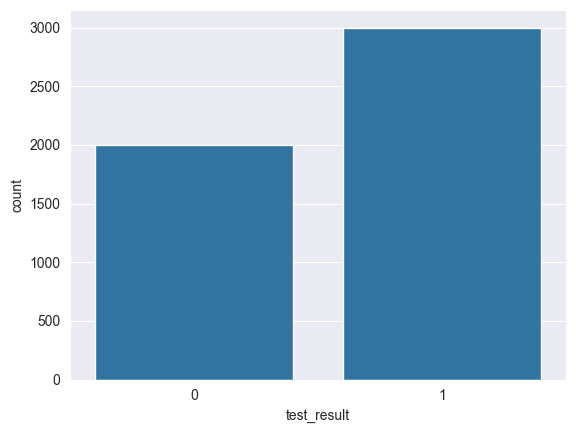

In [34]:
sns.countplot(data=df, x='test_result')

<Axes: xlabel='test_result', ylabel='physical_score'>

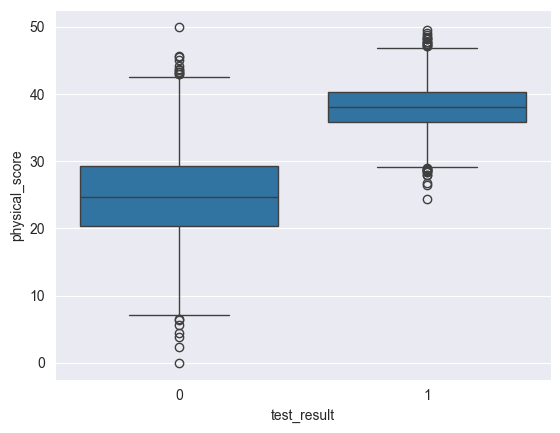

In [35]:
sns.boxplot(data=df, y='physical_score', x='test_result')

<Axes: xlabel='age', ylabel='physical_score'>

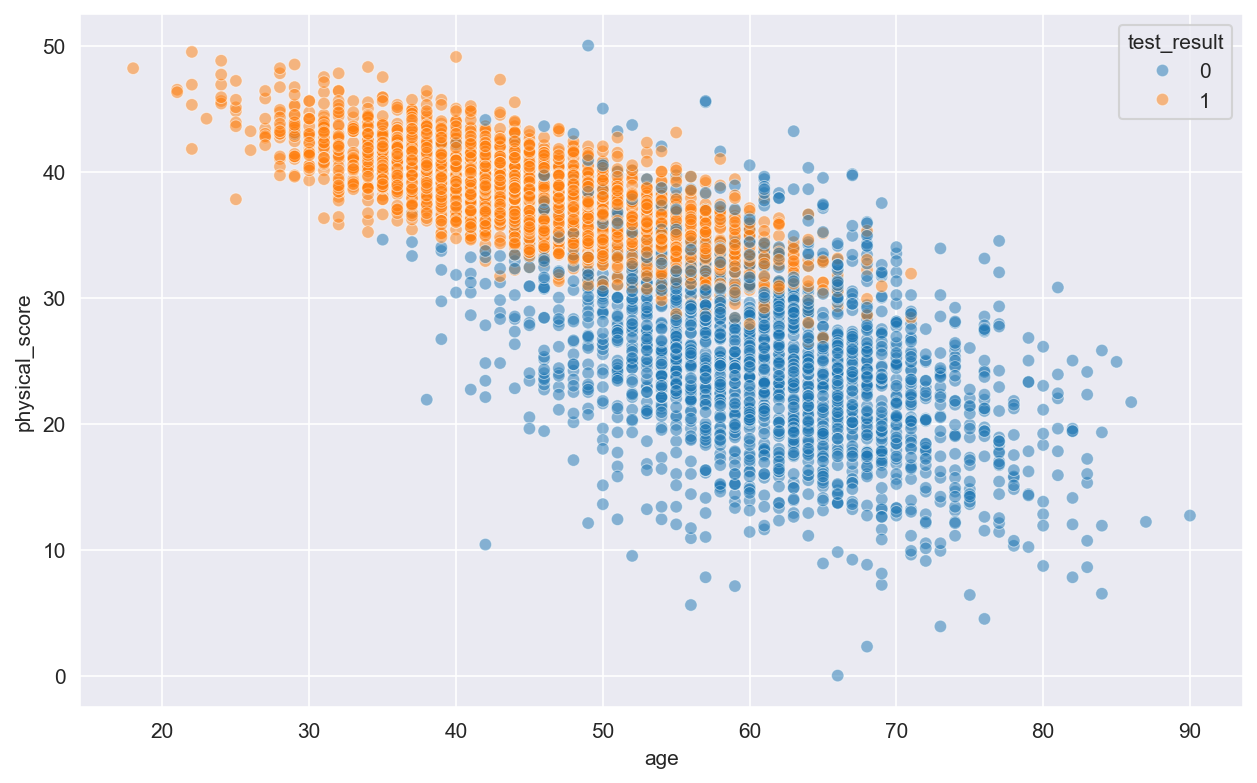

In [36]:
plt.figure(figsize=(10, 6), dpi=150)
sns.scatterplot(data=df, x='age', y='physical_score', hue='test_result', alpha=0.5)

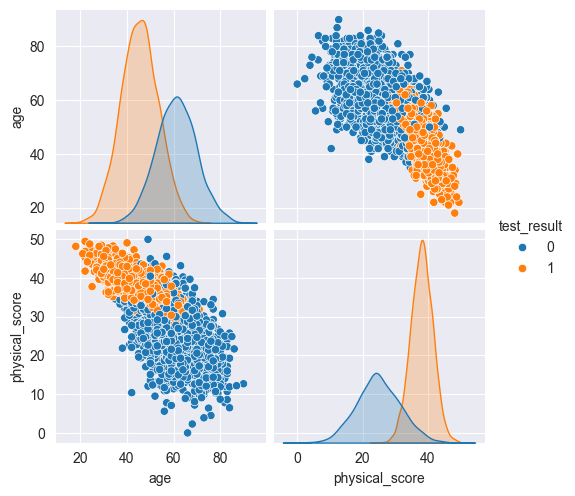

In [37]:
sns.pairplot(data=df, hue='test_result')

<Axes: >

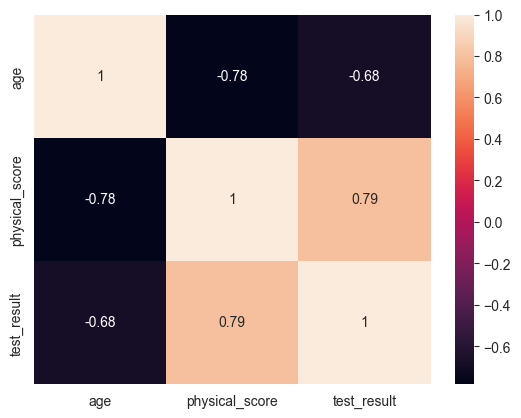

In [38]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

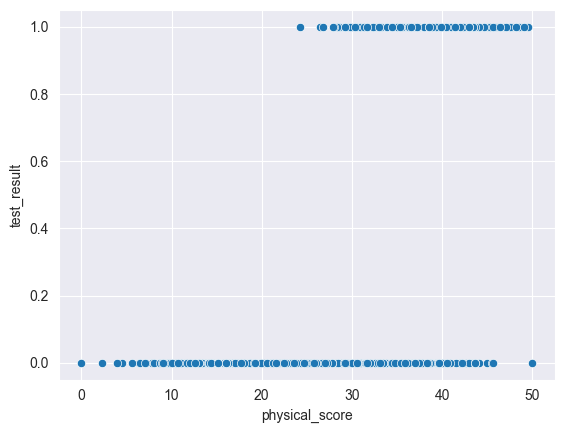

In [39]:
sns.scatterplot(data=df, x='physical_score', y='test_result')

In [40]:
from mpl_toolkits.mplot3d import Axes3D

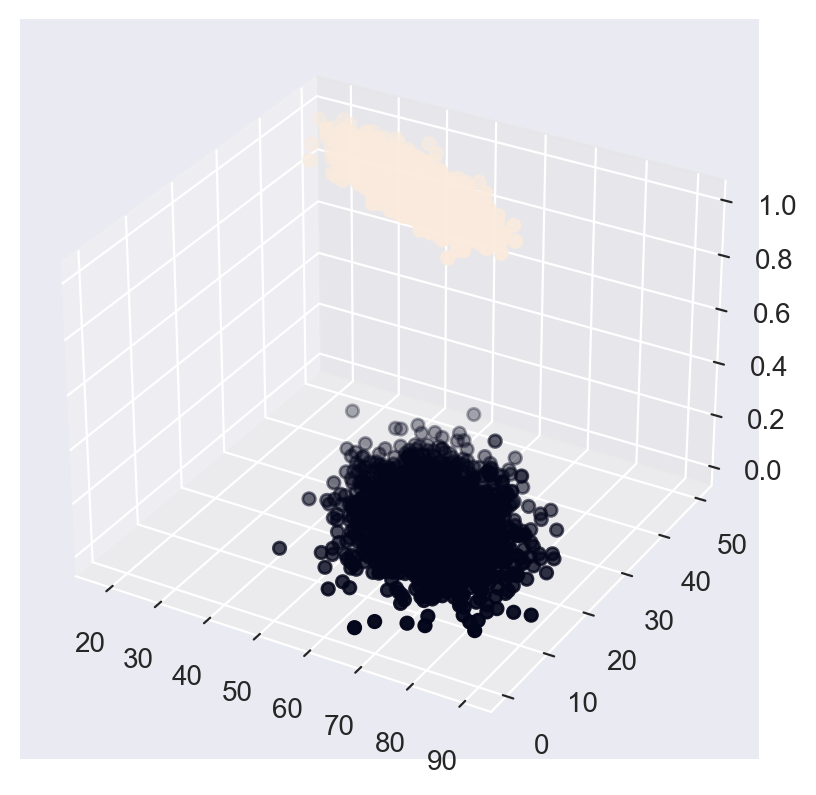

In [41]:
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

In [42]:
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

# 129. Logistic Regression with Scikit-Learn - Part Two - Model Training

In [43]:
X = df.drop('test_result', axis=1)

In [44]:
y = df['test_result']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
scaled_X_train = scaler.fit_transform(X_train)

In [50]:
scaled_X_test = scaler.transform(X_test)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
log_model = LogisticRegression()

In [53]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [54]:
log_model.coef_

array([[-0.9701145 ,  3.57047868]])

In [55]:
y_pred = log_model.predict(scaled_X_test)

In [56]:
y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

# 133. Logistic Regression with Scikit-Learn - Part Three - Performance Evaluation